In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = plt.imread('C:/Users/Vijay/Isaac/image/img2/rsb.jpg')
plt.imshow(img)
plt.show()
y_s,x_s,z=img.shape

ValueError: Only know how to handle extensions: ['png']; with Pillow installed matplotlib can handle more images

In [12]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.3 * r + 0.59 * g + 0.11 * b

    return gray
img1= rgb2gray(img)
lowValY = 200
img1.max() #as this is 254.69 we approximately set it to 200
w, h = (int)(x_s/5), (int)(y_s/9);

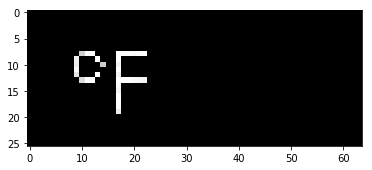

In [13]:
l_t = img1[:h,:w]
l_t = np.asarray(l_t)
low_values_flags = l_t < lowValY  # Where values are low
l_t[low_values_flags] = 0 
plt.imshow(l_t,cmap="gray")
plt.show()

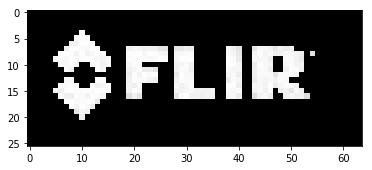

In [14]:
l_b = img1[y_s-h:,:w]
l_b = np.asarray(l_b)
low_values_flags = l_b < lowValY  # Where values are low
l_b[low_values_flags] = 0 
plt.imshow(l_b,cmap="gray")
plt.show()

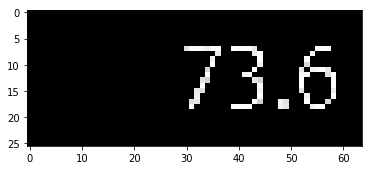

In [15]:
r_b = img1[y_s-h:,x_s-w:]
r_b = np.asarray(r_b)
low_values_flags = r_b < lowValY  # Where values are low
r_b[low_values_flags] = 0 
plt.imshow(r_b,cmap="gray")
plt.show()

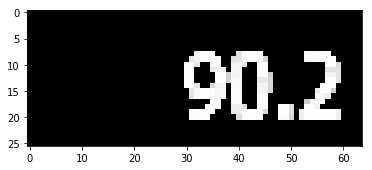

In [37]:
r_t = img1[:h,x_s-w:]
r_t = np.asarray(r_t)
low_values_flags = r_t < lowValY  # Where values are low
r_t[low_values_flags] = 0 
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(r_t,kernel,iterations = 1)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
erosion = cv2.erode(dilation,kernel,iterations = 1)
plt.imshow(dilation,cmap="gray")
plt.show()